## Proyecto Final

1. Histogramas y resumen de los datos.
2. Cruces y gráficos. Comparaciones de marginales vs conjuntas para destacar importancias.
3. Correlaciones y comentarios al respecto.
4. Cuadros y gráficos de cruces entre variables discretas.
5. Cuadros de medias y desviaciones std de las variables continuas vs valores de las variables discretas y discretizadas.
6. Transformación de los datos. Reducción de cardinalidad de los atributos y los cuadros o métricas resultantes.
7. Descripción de diagramas y comentarios sobre los modelos utilizados.
8. Corridas preliminares e interpretaciones.
9. Descripción sobre ajustes al modelo.
10. Métricas ROC, densidades, lifts, correlaciones, varianzas, etc.
11. Interpretación en términos del caso de negocio.

In [120]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
# Librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn import svm
from sklearn.cross_validation import train_test_split
import sklearn.metrics
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [18]:
# Archivo a cargar
datos=pd.read_csv(r'C:\Users\Itzel Zamorano\Documents\Diplomado\Python\BaseCos.csv')
datos.head(5)

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,F128,F129,F130,F131,F132,F133,F134,F135,F136,clase
0,1.048918,1.048569,1.049383,1.045136,1.035635,1.038765,1.032765,1.035271,1.028696,1.028588,...,0.000000,0.000000,0.000000,0.0,0.645161,0.117302,0.234604,0.058651,0.000000,1
1,1.206512,1.197764,1.180049,1.155265,1.149890,1.140326,1.125761,1.120233,1.107607,1.105388,...,0.000000,2.287390,0.000000,0.0,0.175953,2.111437,0.117302,0.000000,0.000000,1
2,0.982336,0.974569,0.982862,0.979049,0.977011,0.974945,0.983158,0.977318,0.983387,0.986544,...,0.645161,0.058651,0.175953,0.0,0.000000,0.762463,0.175953,0.117302,0.175953,0
3,0.888782,0.885816,0.894207,0.897395,0.898868,0.900361,0.909153,0.920582,0.919141,0.923867,...,0.410557,0.997067,0.000000,0.0,0.058651,0.293255,0.058651,0.234604,0.117302,0
4,0.986500,0.998200,0.994945,0.990453,1.010778,1.002943,0.991649,0.996019,1.002549,1.032684,...,0.000000,0.117302,0.000000,0.0,0.117302,0.000000,0.351906,0.703812,0.469208,0


In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Columns: 273 entries, G1 to clase
dtypes: float64(272), int64(1)
memory usage: 388.2 KB


In [96]:
Clase0 = datos[datos.clase == 0]

In [97]:
CClase0 = Clase0.take(np.random.permutation(len(Clase0))[:26])

In [98]:
Clase1 = datos[datos.clase == 1]

In [99]:
Z = pd.concat([CClase0, Clase1],axis=0)

In [100]:
y = Z.clase


In [101]:
X = Z
X.drop(['clase'],inplace=True,axis=1)
X.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,F127,F128,F129,F130,F131,F132,F133,F134,F135,F136
64,0.854361,0.850511,0.847294,0.865153,0.873886,0.884692,0.891651,0.893708,0.903699,0.907606,...,0.821114,0.586510,1.055718,0.000000,0.058651,0.469208,0.351906,0.058651,0.058651,0.058651
99,0.906679,0.897393,0.906126,0.909434,0.910856,0.920335,0.928811,0.934405,0.942011,0.941003,...,10.439883,5.982405,0.000000,11.026393,2.287390,16.950147,0.000000,0.000000,0.000000,0.000000
152,0.984863,0.980651,0.973706,0.967517,0.966152,0.971651,0.976918,0.972851,0.976353,0.985620,...,2.346041,5.454545,0.821114,0.000000,2.228739,1.876833,0.000000,0.000000,0.000000,0.000000
15,1.001860,1.006950,1.006509,1.004619,1.008895,1.004277,1.008180,1.009121,1.001241,1.005963,...,5.337243,2.228739,5.337243,4.222874,0.000000,0.000000,1.524927,0.117302,0.000000,0.000000
81,0.926325,0.921470,0.928966,0.926811,0.931478,0.931271,0.940358,0.943361,0.946763,0.951134,...,3.988270,2.463343,0.000000,4.164223,1.583578,1.700880,0.000000,0.000000,0.000000,0.000000


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=52)

In [104]:
X_train.shape

(36, 272)

In [105]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=.3, random_state=36)

In [106]:
X_train2.shape

(25, 272)

In [107]:
forest = RandomForestClassifier(n_estimators=300,max_features='log2')
score=cross_validation.cross_val_score(forest, X_train2, y_train2)
forest.fit(X_train2, y_train2)
importances = forest.feature_importances_
print(score)

[ 0.44444444  0.75        0.75      ]


In [108]:
#importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
nom=X.columns.values[indices]
feature=importances[indices]

In [113]:
rasgos=pd.DataFrame({'Caracteristicas':nom,'Ponderacion':feature})
umbral=rasgos.Ponderacion.mean()*2.7
rasgos=rasgos[rasgos.Ponderacion>umbral]
rasgos

,Caracteristicas,Ponderacion
0,F19,0.013558
1,G9,0.013523
2,G110,0.013391
3,G102,0.012750
4,F106,0.012331
5,G13,0.011910
6,F35,0.011731
7,F89,0.011673
8,F95,0.011318
9,G106,0.011090


In [111]:
rasgos.describe()

,Ponderacion
count,23.000000
mean,0.010967
std,0.001440
min,0.009285
25%,0.009701
50%,0.010986
75%,0.011821
max,0.013558


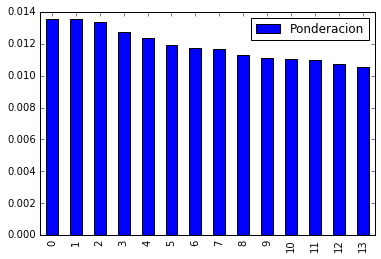

In [114]:
rasgos.plot(kind='bar')

In [128]:
L = X_test2[rasgos.Caracteristicas]
L.head(5)

,F19,G9,G110,G102,F106,G13,F35,F89,F95,G106,F32,G115,F126,F28
116,0.351906,0.991201,0.009916,0.980907,0.879765,0.993668,0.234604,0.175953,0.469208,0.985321,1.114370,1.017345,14.017595,0.645161
81,0.997067,0.946763,0.907266,0.948835,3.284457,0.948250,0.410557,0.762463,2.170088,0.888958,2.346041,0.961737,4.281525,2.287390
26,0.997067,1.001252,1.048000,0.988198,1.348974,1.002089,0.117302,0.410557,0.469208,0.987601,0.410557,0.979849,0.410557,0.586510
84,0.586510,0.916332,0.223963,0.992996,2.932551,0.939245,0.821114,2.287390,2.756598,0.187549,1.114370,0.014208,5.161290,0.175953
75,1.876833,1.023647,1.119701,0.987211,0.469208,1.027154,0.410557,0.762463,0.058651,1.195465,1.055718,1.963338,3.695015,0.351906


In [129]:
M = X_train2[rasgos.Caracteristicas]
M.head(5)

,F19,G9,G110,G102,F106,G13,F35,F89,F95,G106,F32,G115,F126,F28
27,0.000000,0.963526,1.010951,0.993528,0.175953,0.965430,1.407625,1.173021,1.994135,0.987261,0.997067,0.982208,3.929619,0.586510
128,0.821114,1.022799,1.152920,1.013302,0.000000,1.035050,0.527859,0.879765,1.055718,1.103014,2.697947,1.168311,4.868035,2.228739
168,0.527859,1.068196,1.027293,1.001945,0.175953,1.048933,0.058651,0.645161,0.293255,0.992514,0.234604,0.924436,0.000000,0.058651
18,0.821114,1.011488,1.083629,1.001863,1.055718,1.007839,1.290323,0.938416,1.114370,1.016890,0.234604,1.018172,2.170088,0.234604
33,0.351906,0.959644,0.937397,0.984636,0.000000,0.981809,0.175953,0.410557,0.117302,0.989628,0.058651,0.985316,1.231672,0.410557


In [131]:
scores=cross_validation.cross_val_score(forest, M, y_train2)
forest.fit(M, y_train2)
y_predict = forest.predict(L)

In [132]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test2, y_predict, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.67      0.80      0.73         5
    class 1       0.80      0.67      0.73         6

avg / total       0.74      0.73      0.73        11



In [133]:
roc_auc_score(y_test2, y_predict)

0.73333333333333328

In [134]:
y_predict2 = forest.predict(X_test[rasgos.Caracteristicas])

In [135]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predict2, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.56      0.62      0.59         8
    class 1       0.57      0.50      0.53         8

avg / total       0.56      0.56      0.56        16



In [143]:
roc_auc_score(y_test, y_predict2)

0.5625

In [145]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(M, y_train2)
y_pre=clf.predict(L)

In [146]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test2, y_pre, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.57      0.80      0.67         5
    class 1       0.75      0.50      0.60         6

avg / total       0.67      0.64      0.63        11



In [148]:
roc_auc_score(y_test2, y_pre)

0.65000000000000013

In [149]:
y_pre2=clf.predict(X_test[rasgos.Caracteristicas])

In [150]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pre2, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      0.62      0.56         8
    class 1       0.50      0.38      0.43         8

avg / total       0.50      0.50      0.49        16



In [151]:
roc_auc_score(y_test, y_pre2)

0.5

In [152]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(M, y_train2)
y_pre_NB=clf2.predict(L)

In [153]:
print(classification_report(y_test2, y_pre_NB, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.75      0.60      0.67         5
    class 1       0.71      0.83      0.77         6

avg / total       0.73      0.73      0.72        11



In [154]:
sklearn.metrics.accuracy_score(y_test2,y_pre_NB)

0.72727272727272729

In [155]:
y_pre_NB2 =clf2.predict(X_test[rasgos.Caracteristicas])

In [159]:
print(classification_report(y_test, y_pre_NB2,target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.60      0.38      0.46         8
    class 1       0.55      0.75      0.63         8

avg / total       0.57      0.56      0.55        16



In [162]:
sklearn.metrics.accuracy_score(y_test,y_pre_NB2)

0.5625